(image-segmentation:relabel-sequential)=
# 顺序对象（重新）标记

如上所述，根据具体用例，对图像中的对象进行顺序标记可能很重要。例如，如果我们传递一个缺少标签的标签图像，标签图像的后处理算法可能会崩溃。因此，我们应该知道如何顺序重新标记图像。

In [1]:
import numpy as np
from skimage.io import imread
from skimage.segmentation import relabel_sequential
import pyclesperanto_prototype as cle

我们的起点是一个包含1-8标签的标签图像，其中一些标签不存在：

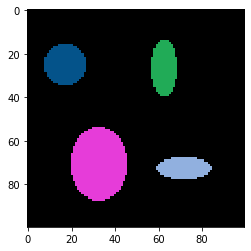

In [2]:
label_image = imread("../../data/label_map_with_index_gaps.tif")
cle.imshow(label_image, labels=True)

当测量图像中的最大强度时，我们可以看到这个包含4个标签的标签图像显然没有按顺序标记。

In [3]:
np.max(label_image)

8

我们可以使用`unique`函数来确定存在哪些标签：

In [4]:
np.unique(label_image)

array([0, 1, 2, 4, 8], dtype=uint8)

## 顺序标记
现在我们可以使用[scikit-image的`relabel_sequential()`函数](https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.relabel_sequential)重新标记这个图像并删除这些间隔。我们输入`_`作为额外的返回变量，因为我们对它们不感兴趣。这是必要的，因为`relabel_sequential`函数返回三个东西，但我们只需要第一个。

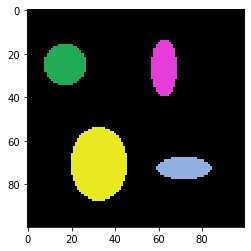

In [5]:
relabeled, _, _ = relabel_sequential(label_image)

cle.imshow(relabeled, labels=True)

之后，唯一的标签应该是连续的：

In [6]:
np.unique(relabeled)

array([0, 1, 2, 3, 4], dtype=uint8)

pyclesperanto也有一个用于顺序重新标记标签图像的函数。结果应该与scikit-image的结果相同。它只是不返回额外的值。

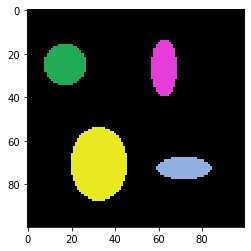

In [7]:
relabeled1 = cle.relabel_sequential(label_image)

cle.imshow(relabeled1, labels=True)

## 恢复顺序标记
在某些情况下，我们对标签图像应用一个操作，该操作返回一个具有较少标签的新标签图像，这些标签是顺序标记的，但标签身份丢失了。例如，当从标签图像中排除太小的标签时，就会发生这种情况。

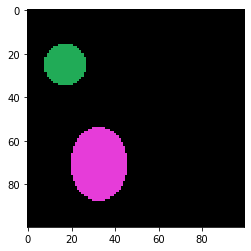

In [8]:
large_labels = cle.exclude_small_labels(relabeled, maximum_size=260)

cle.imshow(large_labels, labels=True, max_display_intensity=4)

In [9]:
np.unique(large_labels)

array([0, 1, 2], dtype=uint32)

为了恢复原始标签身份，我们需要将表示剩余标签的二进制图像与原始标签图像相乘。

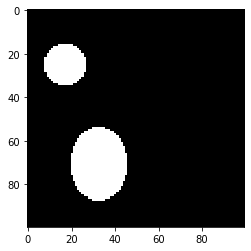

In [10]:
binary_remaining_labels = large_labels > 0

cle.imshow(binary_remaining_labels)

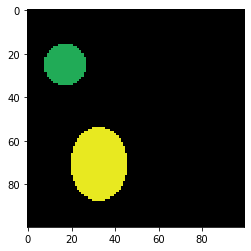

In [11]:
large_labels_with_original_identity = binary_remaining_labels * relabeled

cle.imshow(large_labels_with_original_identity, labels=True, max_display_intensity=4)

In [12]:
np.unique(large_labels_with_original_identity)

array([0., 1., 3.], dtype=float32)

现在我们可以得出结论，身份为2和4的标签太小，因此被排除了。